In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E-com_Data.csv')

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [8]:
df.duplicated().sum()

3145

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
# CustomerID
df['CustomerID'].isnull().sum()

133790

In [13]:
# We cannot build our model with any random customer ID. So we can drop the columns with customerId as null

In [14]:
df = df.dropna(subset = ['CustomerID'])

In [15]:
df['CustomerID'].isnull().sum()

0

In [16]:
# Item Code

# Since we concerned about the RFM, item code do not play a significant role, we can drop this.

In [17]:
# InvoieNo

# We need Invoice for further analysis, we can keep this

In [ ]:
# Date of purchase

# We need Date of purchase for further analysis, we can keep this

In [ ]:
# Time

# Here we are really concerned about sales basis of time. So we can drop this as well.

In [19]:
# Quantity

# We need entire money spent on the item so we can keep this and later we can drop this.

# price per Unit

# We need entire money spent on the item so we can keep this and later we can drop this.

In [ ]:
# Price

In [21]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [22]:
df['new_price'] = df['price per Unit']*df['Quantity']

In [24]:
df[df['Price'] != df['Price']]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,new_price


In [25]:
# We could see Price column is giving the entire money spent on the invoic. Hence we can drop 'Quamtity' and 'price per unit'

In [26]:
# Shipping Location

# Here we do not really concerned abou the location. Hence, we can drop this

In [27]:
df = df.drop(['Cancelled_status','Reason of return','Sold as set',
              'Item Code','Time','Quantity','price per Unit','Shipping Location','new_price'],axis=1)

In [28]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404181 non-null  float64
 1   InvoieNo          404181 non-null  float64
 2   Date of purchase  404181 non-null  object 
 3   Price             404181 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [30]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404181 non-null  float64       
 1   InvoieNo          404181 non-null  float64       
 2   Date of purchase  404181 non-null  datetime64[ns]
 3   Price             404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [32]:
print(max(df['Price']))
print(min(df['Price']))

90400.0
-10152.0


In [37]:
df = df.rename(columns={'Date of purchase':'Date_of_purchase'})

In [33]:
def handle_price(num):
    if num<=0:
        return 0
    else:
        return num

In [34]:
df['Price'] = df['Price'].apply(handle_price)

In [35]:
print(max(df['Price']))
print(min(df['Price']))

90400.0
0.0


In [39]:
df['Date_of_purchase'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date_of_purchase, dtype: object

In [40]:
import datetime
new_date = datetime.datetime(2017,12,20)

In [41]:
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [42]:
df.columns

Index(['CustomerID', 'InvoieNo', 'Date_of_purchase', 'Price'], dtype='object')

In [51]:
RFMapproach = df.groupby('CustomerID').agg({'Date_of_purchase':lambda x : (new_date-x.max()).days,
                                            'InvoieNo':lambda x : x.count(),
                                            'Price':lambda x : x.sum()})

RFMapproach.rename(columns = {'Date_of_purchase':'Recency','InvoieNo':'Frequency','Price':'Monetary'},inplace=True)

In [56]:
RFMapproach = RFMapproach.reset_index()

In [57]:
RFMapproach.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182.0,553704.0
1,3.0,77,27.0,257404.0
2,4.0,20,72.0,176613.0
3,5.0,18,16.0,41976.0
4,6.0,9,84.0,166972.0


In [58]:
RFMapproach.describe()

,CustomerID,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4349.000000,4.349000e+03
mean,2187.093355,61.445160,92.936537,2.326391e+05
std,1261.544319,89.656941,232.086935,8.613615e+05
min,2.000000,1.000000,1.000000,0.000000e+00
25%,1095.000000,10.000000,17.000000,3.880600e+04
50%,2186.000000,19.000000,42.000000,8.575500e+04
75%,3279.000000,73.000000,101.000000,2.080960e+05
max,4372.000000,617.000000,7970.000000,3.553619e+07


In [60]:
quantiles = RFMapproach.quantile([0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38806.0, 0.5: 85755.0, 0.75: 208096.0}}

In [61]:
def Recency_value(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def Freq_Monet_value(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [63]:
RFMapproach['R'] = RFMapproach['Recency'].apply(Recency_value,args=('Recency',quantiles))
RFMapproach['F'] = RFMapproach['Frequency'].apply(Freq_Monet_value,args=('Frequency',quantiles))
RFMapproach['M'] = RFMapproach['Monetary'].apply(Freq_Monet_value,args=('Monetary',quantiles))

In [64]:
RFMapproach.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182.0,553704.0,1,1,1
1,3.0,77,27.0,257404.0,4,3,1
2,4.0,20,72.0,176613.0,3,2,2
3,5.0,18,16.0,41976.0,2,4,3
4,6.0,9,84.0,166972.0,1,2,2


In [65]:
RFMapproach['RFM'] = RFMapproach[['R','F','M']].sum(axis=1)

In [66]:
RFMapproach.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,182.0,553704.0,1,1,1,3
1,3.0,77,27.0,257404.0,4,3,1,8
2,4.0,20,72.0,176613.0,3,2,2,7
3,5.0,18,16.0,41976.0,2,4,3,9
4,6.0,9,84.0,166972.0,1,2,2,5


In [67]:
loyality_level = ['Diamond','Platinum','Gold','Silver']
score_cuts = pd.qcut(RFMapproach.RFM,q=4,labels=loyality_level)
RFMapproach['loyality_level']=score_cuts.values
RFMapproach = RFMapproach.reset_index()

In [68]:
RFMapproach.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,loyality_level
0,0,2.0,4,182.0,553704.0,1,1,1,3,Diamond
1,1,3.0,77,27.0,257404.0,4,3,1,8,Platinum
2,2,4.0,20,72.0,176613.0,3,2,2,7,Platinum
3,3,5.0,18,16.0,41976.0,2,4,3,9,Gold
4,4,6.0,9,84.0,166972.0,1,2,2,5,Diamond


In [74]:
RFMapproach[RFMapproach['loyality_level']=='Platinum']

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,loyality_level
1,1,3.0,77,27.0,257404.0,4,3,1,8,Platinum
2,2,4.0,20,72.0,176613.0,3,2,2,7,Platinum
6,6,8.0,234,58.0,135550.0,4,2,2,8,Platinum
10,10,12.0,2,17.0,105674.0,1,4,2,7,Platinum
15,15,17.0,16,23.0,78378.0,2,3,3,8,Platinum
...,...,...,...,...,...,...,...,...,...,...
4325,4325,4349.0,51,98.0,64097.0,3,2,3,8,Platinum
4329,4329,4353.0,25,42.0,274078.0,3,3,1,7,Platinum
4333,4333,4357.0,13,62.0,199538.0,2,2,2,6,Platinum
4334,4334,4358.0,13,46.0,97001.0,2,2,2,6,Platinum


In [75]:
RFMapproach.to_csv('my_Analysis.csv')

In [77]:
final_report = RFMapproach.groupby('loyality_level')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'sum',
                                                                                                           'Frequency':'sum',
                                                                                                           'Monetary':'sum',
                                                                                                           'CustomerID':'sum'})

In [79]:
final_report = final_report.reset_index()

In [80]:
final_report

,loyality_level,Recency,Frequency,Monetary,CustomerID
0,Diamond,13384,298611.0,776350668.0,2787705.0
1,Platinum,41853,73758.0,161674241.0,2775255.0
2,Gold,79240,23603.0,53832525.1,2099302.0
3,Silver,132748,8209.0,19889996.0,1849407.0


In [81]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})

In [82]:
final_report

,loyality_level,Recency,Frequency,Monetary,NumBuyers
0,Diamond,13384,298611.0,776350668.0,2787705.0
1,Platinum,41853,73758.0,161674241.0,2775255.0
2,Gold,79240,23603.0,53832525.1,2099302.0
3,Silver,132748,8209.0,19889996.0,1849407.0


In [83]:
final_report['Percent'] = round((final_report['NumBuyers']/final_report.NumBuyers.sum())*100,2)

In [84]:
final_report

,loyality_level,Recency,Frequency,Monetary,NumBuyers,Percent
0,Diamond,13384,298611.0,776350668.0,2787705.0,29.31
1,Platinum,41853,73758.0,161674241.0,2775255.0,29.18
2,Gold,79240,23603.0,53832525.1,2099302.0,22.07
3,Silver,132748,8209.0,19889996.0,1849407.0,19.44


In [86]:
final_report1 = final_report[['loyality_level','NumBuyers', 'Percent']]
final_report1

,loyality_level,NumBuyers,Percent
0,Diamond,2787705.0,29.31
1,Platinum,2775255.0,29.18
2,Gold,2099302.0,22.07
3,Silver,1849407.0,19.44


In [91]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [92]:
import squarify

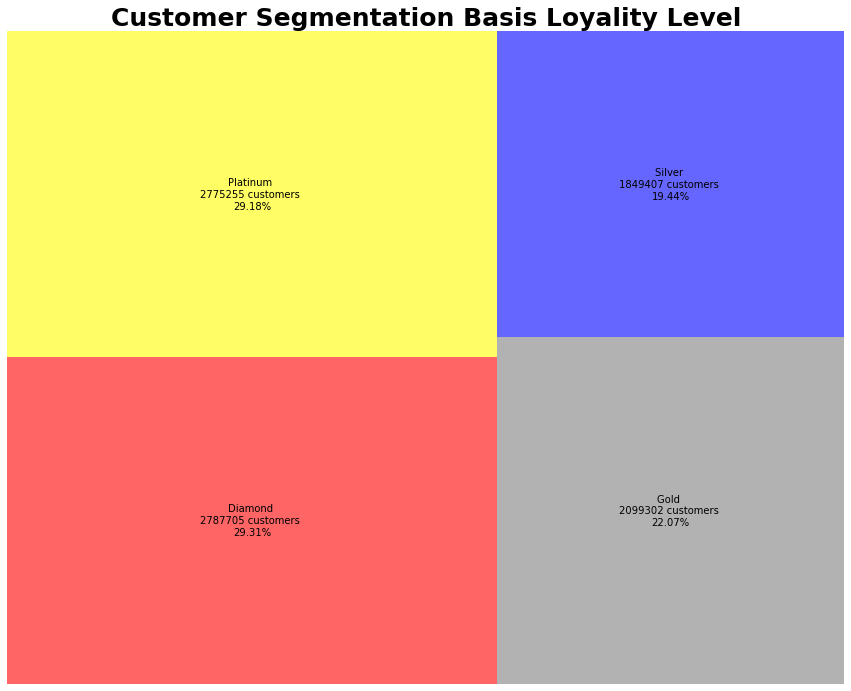

In [93]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Diamond':'red', 'Platinum':'yellow', 'Gold':'gray','Silver':'blue'}

squarify.plot(sizes=final_report1['NumBuyers'],color=colors_dics.values(),
             label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for 
                     i in range(0, len(final_report1))], alpha=0.6)

plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight='bold')
plt.axis('off')
plt.show()